In [14]:
# Predict the results of football matches of the Spanish First Division League
# Eduardo Sthory

In [15]:
# Libraries
# import warnings filter
import warnings
from sklearn.exceptions import DataConversionWarning
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
simplefilter(action='ignore', category=DeprecationWarning)
simplefilter(action='ignore', category=UserWarning)
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

import numpy as np
import pandas as pd
from IPython.display import display
from Functions import result_to_numeric, best_features
#from Functions.ipynb import result_to_numeric, best_features
import Functions 
from Features_Engineer import features_engineer
from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.preprocessing import scale
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sea

Name of the results dataset fields SOURCE:
    - SP1-2015.csv
    - SP1-2016.csv
    - SP1-2017.csv
    - SP1-2018.csv
 
 Fields:
 
 - Div = League Division
 - Date = Match Date (dd/mm/yy)
 - HomeTeam = Home Team
 - AwayTeam = Away Team
 - FTHG and HG = Full Time Home Team Goals
 - FTAG and AG = Full Time Away Team Goals
 - FTR and Res = Full Time Result (H=Home Win, D=Draw, A=Away Win)
 - HTHG = Half Time Home Team Goals
 - HTAG = Half Time Away Team Goals
 - HTR = Half Time Result (H=Home Win, D=Draw, A=Away Win)
 
 Match Statistics 
 
 - HS = Home Team Shots
 - AS = Away Team Shots
 - HST = Home Team Shots on Target
 - AST = Away Team Shots on Target
 - HC = Home Team Corners
 - AC = Away Team Corners
 - HF = Home Team Fouls Committed
 - AF = Away Team Fouls Committed

In [16]:
# Load last Season 2015-2018
data4 = pd.read_csv('SP1-2015.csv')
data5 = pd.read_csv('SP1-2016.csv')
data6 = pd.read_csv('SP1-2017.csv')
data7 = pd.read_csv('SP1-2018.csv')

# Eliminate unnecessary columns
data4 = data4.iloc[:,:18]
data5 = data5.iloc[:,:18]
data6 = data6.iloc[:,:18]
data7 = data7.iloc[:,:18]

# Drop Div, Date and others
data4 = data4.drop(['Div','Date','HTHG','HTAG','HTR'],axis=1)
data5 = data5.drop(['Div','Date','HTHG','HTAG','HTR'],axis=1)
data6 = data6.drop(['Div','Date','HTHG','HTAG','HTR'],axis=1)
data7 = data7.drop(['Div','Date','HTHG','HTAG','HTR'],axis=1)

# Transform FTR (Target)
data4['FTR'] = data4.apply(lambda row: result_to_numeric(row),axis=1)
data5['FTR'] = data5.apply(lambda row: result_to_numeric(row),axis=1)
data6['FTR'] = data6.apply(lambda row: result_to_numeric(row),axis=1)
data7['FTR'] = data7.apply(lambda row: result_to_numeric(row),axis=1)

In [17]:
# Union data
# It was decided to work with the last 4 seasons
features = pd.concat([data4, data5, data6, data7], ignore_index=True)
target = pd.concat([data4['FTR'], data5['FTR'], data6['FTR'], data7['FTR']], ignore_index=True)

In [18]:
# Get features fields more importants
features_tmp = features[['FTHG','FTAG','HS','AS','HST','AST','HF','AF','HC','AC']]
# Rank Best features
tmp=best_features(features_tmp, target)
print(tmp)  

  Specs       Score
1  FTAG  729.016106
0  FTHG  715.392089
5   AST  332.519118
4   HST  267.632183
3    AS   80.582635
2    HS   19.843785
8    HC   10.059689
6    HF    6.658827
7    AF    4.390677
9    AC    0.717501


The FTAG, FTHG, AST and HST characteristics are the most important, we are going to work with them

# Visualize the best features

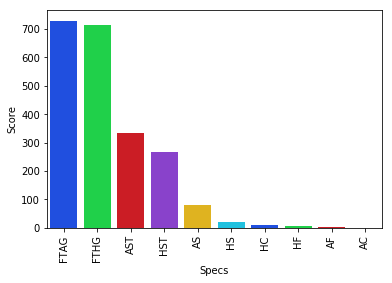

In [19]:
# Barplot feature most important
tmp=Functions.visualize_best_features(tmp)

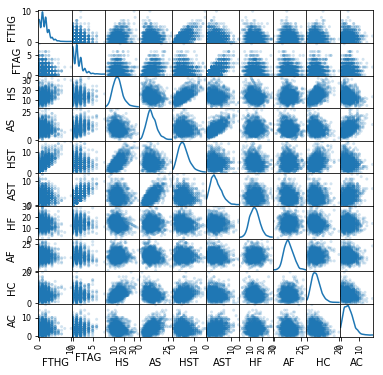

In [20]:
# Explore data
from pandas.plotting import scatter_matrix

spm1 = scatter_matrix(features[['FTHG','FTAG','HS','AS','HST','AST','HF','AF','HC','AC']],
                       alpha=0.2,figsize=(6,6),diagonal = 'kde')

In [21]:
features.describe()

,FTHG,FTAG,FTR,HS,AS,HST,AST,HF,AF,HC,AC
count,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.00000,1520.000000
mean,1.570395,1.171711,0.183553,13.552632,10.455263,4.873684,3.756579,13.759211,13.704605,5.61250,4.138816
std,1.351971,1.172480,0.847794,4.778696,4.250311,2.529321,2.180761,4.262292,4.170681,2.83665,2.464189
min,0.000000,0.000000,-1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000
25%,1.000000,0.000000,-1.000000,10.000000,7.000000,3.000000,2.000000,11.000000,11.000000,4.00000,2.000000
50%,1.000000,1.000000,0.000000,13.000000,10.000000,5.000000,3.000000,14.000000,13.000000,5.00000,4.000000
75%,2.000000,2.000000,1.000000,16.000000,13.000000,6.000000,5.000000,16.000000,16.000000,7.00000,6.000000
max,10.000000,8.000000,1.000000,34.000000,28.000000,15.000000,13.000000,29.000000,29.000000,20.00000,17.000000


Drop characteristics with less importance

In [22]:
# Drop HC, AC, AS, HS, HF, AF
features = features.drop(['HC','AC','AS','HS','HF','AF'],axis=1)

In [23]:
features

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HST,AST
0,Malaga,Sevilla,0,0,0,5,2
1,Ath Madrid,Las Palmas,1,0,1,3,1
2,Espanol,Getafe,1,0,1,2,3
3,La Coruna,Sociedad,0,0,0,5,2
4,Vallecano,Valencia,0,0,0,3,4
5,Ath Bilbao,Barcelona,0,1,-1,2,4
6,Betis,Villarreal,1,1,0,6,4
7,Levante,Celta,1,2,-1,2,6
8,Sp Gijon,Real Madrid,0,0,0,0,8
9,Granada,Eibar,1,3,-1,6,4


# Features Engineer

Taking into account the above, we will take to work the FTAG, FTHG, AST and HST features.
These characteristics will not be present when the prediction is made, therefore we will 
create new characteristics based on these and that can accumulate in some way the values 
of the training.
These new features will be: 

   - TFTG  accumulated - Full Time Home Team Goals
   - TFTA  accumulated - Full Time Away Team Goals

   - GAHT   accumulated - Goals against HomeTeam
   - GAAT   accumulated - Goals against AwayTeam

   - THST   Total - Home Team Shots on Target
   - TAST   Total - Away Team Shots on Target

   - HTP    Home Total Points accumulate
   - ATP    Away Total Points accumulate 

   - HGA    HomeTeam Goal Average
   - AGA    AwayTeam Goal Average

In [25]:
# Features Engineer
features = features_engineer(features, target)

The statistics of the first week (the first 19 records) must be 0, 
since each team plays only once and does not have any antecedents to calculate it.

In [26]:
features.head(40)

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HST,AST,TFTHG,TFTAG,GAHT,...,HTP,ATP,HGA,AGA,diffg,diffp,diffshots,diffgoals,HTgoals,ATgoals
0,Malaga,Sevilla,0,0,0,5,2,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.00,0.00,0.000000,0.000000
1,Ath Madrid,Las Palmas,1,0,1,3,1,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.00,0.00,0.000000,0.000000
2,Espanol,Getafe,1,0,1,2,3,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.00,0.00,0.000000,0.000000
3,La Coruna,Sociedad,0,0,0,5,2,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.00,0.00,0.000000,0.000000
4,Vallecano,Valencia,0,0,0,3,4,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.00,0.00,0.000000,0.000000
5,Ath Bilbao,Barcelona,0,1,-1,2,4,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.00,0.00,0.000000,0.000000
6,Betis,Villarreal,1,1,0,6,4,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.00,0.00,0.000000,0.000000
7,Levante,Celta,1,2,-1,2,6,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.00,0.00,0.000000,0.000000
8,Sp Gijon,Real Madrid,0,0,0,0,8,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.00,0.00,0.000000,0.000000
9,Granada,Eibar,1,3,-1,6,4,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.00,0.00,0.000000,0.000000


In [27]:
features.tail(20)

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HST,AST,TFTHG,TFTAG,GAHT,...,HTP,ATP,HGA,AGA,diffg,diffp,diffshots,diffgoals,HTgoals,ATgoals
1500,Ath Bilbao,Celta,3,1,1,4,2,1.258797,1.547476,1.648631,...,1.670665,1.340490,0.051299,-0.684214,0.50,0.25,0.25,-0.25,-0.517684,-0.081464
1501,Ath Madrid,Sevilla,1,1,0,4,5,1.947092,1.741581,0.138660,...,3.034351,1.920430,2.402883,0.278550,0.50,0.50,-0.25,0.25,-0.229260,-0.520558
1502,Barcelona,Getafe,2,0,1,8,0,4.154833,0.408727,0.770741,...,3.547420,0.733576,4.669878,-0.245058,0.50,0.50,0.50,0.50,5.020066,-0.520558
1503,Betis,Huesca,2,1,1,8,2,1.063996,-0.691201,2.508963,...,1.265610,-0.871374,-1.031445,-0.515308,-0.25,0.50,0.50,0.50,2.078136,-0.520558
1504,Girona,Levante,1,2,-1,6,2,-0.104808,0.551071,0.402027,...,-0.084573,0.315480,-0.523909,-1.072698,0.25,-0.25,-0.25,-0.50,-0.517684,0.453086
1505,Leganes,Espanol,0,2,-1,4,7,0.167913,0.978102,1.051666,...,0.387991,1.353977,-0.794595,-0.937573,0.00,-0.50,-0.50,-0.50,-0.517684,0.682178
1506,Sociedad,Real Madrid,3,1,1,7,2,1.544504,3.604989,2.070018,...,1.535647,3.134259,0.017463,3.437093,-0.50,-0.50,-0.50,-0.50,-0.517684,2.534010
1507,Valencia,Alaves,3,1,1,4,3,1.557491,0.305205,1.753978,...,1.670665,0.733576,0.338903,-0.515308,0.50,0.50,0.50,0.50,1.328233,-0.520558
1508,Vallecano,Valladolid,1,2,-1,5,6,-0.039874,-0.820604,0.946319,...,-0.341108,-0.763478,-0.963773,-0.447745,-0.25,0.25,0.50,0.50,0.636014,-0.520558
1509,Villarreal,Eibar,1,0,1,3,0,1.427624,1.288670,1.455495,...,1.859691,1.340490,0.457328,-0.413964,0.50,0.25,0.25,0.25,-0.325401,-0.520558


The new features have the expected importance to train the model, 
remember that the statistics of the game know them after its completion, 
therefore you must work with the data prior to the game, 
this way we can now eliminate those characteristics that "No we must use":
These are: 
    FTAG, FTHG, AST, HST

# Split Train and Test
We can not use the sklearn methods to perform the "splits", since we are working with time series and can not choose random data

In [28]:
# Choose the characteristics for learning and testing
cols = ['TFTHG','TFTAG', 'GAHT', 'GAAT','HGA','AGA','HTP','ATP',
        'diffgoals','diffshots','diffp','diffg']

# Amount of the test , 20%, 80% Train
n = 160     # 40 * 4 season = 160

# Split feature_table: Training (only the matches already played)
X_train = features[cols]
X_train = X_train[:-n] # Eliminate the last n rows, (nrows - n) for training

# Split target Train: only the matches already played
y_train = target[:-n] # Eliminate the last n rows, (nrows - n) for training


# Split feature_table: Test (only the games not played)
X_test = features[cols]
X_test = X_test[features.shape[0]-n:] # n rows for the test

# Split target test: only the games not played
y_test = target[target.shape[0]-n:]

# Construction of the models
We will start testing the following models:
    - LogisticRegression
    - xgboost
    - KNeighbors
    - SVC
    - Decision Tree 
    - Random Forest
    - AdaBoost
    - Gradient Boosting
    - Naive Bayes
    
For the metrics we will use:
    - f1 Score
    - Cross Val Score
    
For the tuning:
    - GridSearchCV
    
And finally: we will use the "Stacking" technique to try to improve the accuracy

# Training and test models

In [ ]:
from sklearn.model_selection import TimeSeriesSplit, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score

f1_scores = dict()

classifiers = [
    LogisticRegression(random_state=12),
    XGBClassifier(random_state=12),
    KNeighborsClassifier(3),
    SVC(random_state = 42, kernel='rbf', gamma='auto',probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB()]

# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

time_split = TimeSeriesSplit(n_splits=10)

for clf in classifiers:
    clf_name = clf.__class__.__name__
    
    print("-"*82+"\n")
    print("Clasifier: " + clf_name)
    print('****Results****')

    y_predict_test = clf.fit(X_train, y_train).predict(X_test)
    acc=accuracy_score( y_test, y_predict_test)
    print("Accuracy Score: " + str(round(100*acc, 2)) + "% \n")
    
    scores_test = cross_val_score(clf, features[cols], target, cv=time_split, scoring='accuracy')
    print("Cross Val Score: " + str(round(100*scores_test.mean(), 2)) + "% \n")

    # F1 Scores
    print("f1 Score: " + 
          str(round(100 * f1_score(y_predict_test, 
                                   y_test, 
                                   average='micro'), 2)) + "% \n")

    #train_predictions = clf.predict_proba(X_test)
    train_predictions = y_predict_test
    log_entry = pd.DataFrame([[clf_name, acc*100]], columns=log_cols)
    log = log.append(log_entry)
    
print("-"*82)

# Visualize the Classifier Accuracy

In [ ]:
import seaborn as sns
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

# Tuning using GridSearchCV

According to the above, I will take the best classifiers to optimize them:
    - LogisticRegression
    - XGBClassifier
    - SVC
    - AdaBoostClassifier
    - GaussianNB (it does not have hyperparameters to optimize) 

In [31]:
# Models for GridSearchCV

models = [{'name': 'Logistic Regression','label': 'Logistic Regression',
           'classifier': LogisticRegression(random_state=49),
           'grid': {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}},
          
          {'name': 'Xgboost','label':'Xgboost',
           'classifier':XGBClassifier(),
           'grid': {'objective':['binary:logistic'],
                    'learning_rate': [0.05], 
                    'max_depth': [6],
                    'min_child_weight': [11],
                    'silent': [1],
                    'subsample': [0.8],
                    'colsample_bytree': [0.7],
                    'n_estimators': [1000], 
                    'missing':[-999],
                    'seed': [1200]}},
          
          {'name': 'SVC (RBF)', 'label': 'SVC (RBF)',
           'classifier':SVC(random_state=49, probability=True ),
           'grid': {'C': [1, 10, 100, 1000], 
                    'gamma': [0.001, 0.0001], 
                    'kernel': ['rbf']}},
          
          {'name': 'AdaBoost', 'label': 'AdaBoost Classifier',
           'classifier':AdaBoostClassifier(learning_rate=1,
                                           random_state=49),
           'grid': { 'n_estimators': [16, 32] }}]

In [ ]:
def model_selection(classifier, name, grid, X_train, y_train, scoring):
    
    gridsearch_cv=GridSearchCV(classifier, 
                               grid,
                               cv=5, 
                               scoring = scoring)
    
    gridsearch_cv.fit(X_train, y_train)
    
    results_dict = {}
    
    results_dict['classifier_name'] = name    
    results_dict['classifier'] = gridsearch_cv.best_estimator_
    results_dict['best_params'] = gridsearch_cv.best_params_
    results_dict['accuracy'] = gridsearch_cv.best_score_
    
    return(results_dict)
results = []

for m in models:    
    print(m['name'], ".....")    
    results.append(model_selection(m['classifier'], 
                                   m['name'],
                                   m['grid'],
                                   X_train, 
                                   y_train, 
                                   'accuracy'))      
    print('....ready ', m['name'])

In [ ]:
results_df = pd.DataFrame(results).sort_values(by='accuracy', ascending = False)

# Results Tuning

In [ ]:
results_df

In [ ]:
print(results_df.loc[results_df['classifier_name'] == 'Logistic Regression'].best_params.values)

# Best Classifiers:
    
    - Logistic regression, accuracy: 0.525 (with tuning)
    - SVC, accuracy: 0.522 (with tuning)
    - AdaBoostClassifier, accuracy: 0.481 (without tuning)

# Stacking
To try to improve the accuracy we will use the technique of "Stacking"

We will use the following models in the layers:
    
    - LogisticRegression
    - SVC
    - AdaBoostClassifier
    
And as a last layer (similar to 'softmax') we will use LogisticRegression 

In [ ]:
from mlens.ensemble import Subsemble

from mlens.metrics.metrics import rmse

#LogisticRegression,SVC,AdaBoostClassifier,GaussianNB

ensemble = Subsemble()
ensemble.add([AdaBoostClassifier()])
ensemble.add([LogisticRegression(C=0.1, penalty='l1', random_state=49)])
ensemble.add([SVC(C=1000, gamma=0.001, kernel='rbf')])

ensemble.add(LogisticRegression(random_state=49), meta=True)

ensemble.fit(X_train, y_train)
preds = ensemble.predict(X_test)
print(accuracy_score(y_test, preds))

# Conclusion 
The Stacking technique decreased the accuracy.
We are left with the LogisticRegression model that has best accuracy